<a href="https://www.kaggle.com/code/alirizaercan/recurrent-neural-network-rnn-airline-passenger?scriptVersionId=206996665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Airline Passenger Number Forecast

## Business Problem

In this notebook, our purpose is to predict of airline passenger number.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
df = pd.read_csv('/kaggle/input/international-airline-passengers/international-airline-passengers.csv')
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [3]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [5]:
df.columns = ["Month", "Passengers"]

In [6]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [8]:
df.shape

(145, 2)

In [9]:
df.dtypes

Month          object
Passengers    float64
dtype: object

In [10]:
df.isnull().sum()

Month         0
Passengers    1
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


## Data Preparation

In [12]:
df = df[:144]

In [13]:
df.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [14]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [15]:
df["Month"] = pd.to_datetime(df["Month"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [17]:
print("Min Date: " , df["Month"].min())
print("Max Date: " , df["Month"].max())

Min Date:  1949-01-01 00:00:00
Max Date:  1960-12-01 00:00:00


In [18]:
df.index = df["Month"]

In [19]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [20]:
df.drop("Month", axis = 1, inplace = True )

In [21]:
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [22]:
result_df = df.copy()

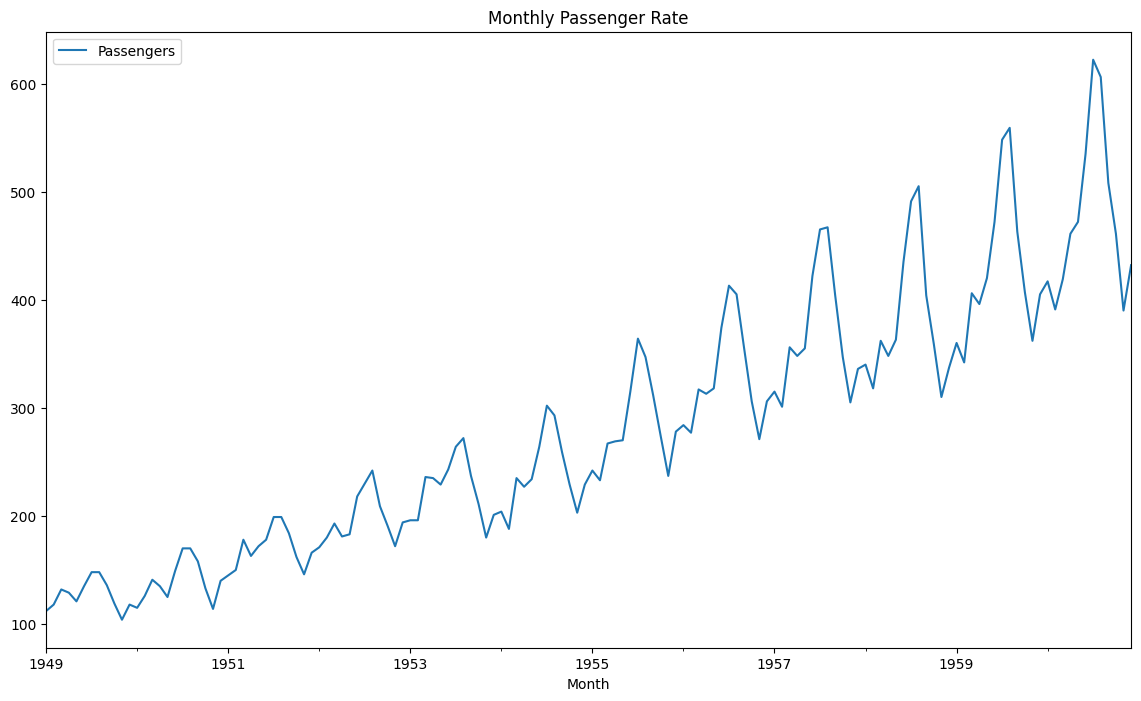

In [23]:
df.plot(figsize = (14, 8), title = "Monthly Passenger Rate")
plt.show()

In [24]:
data = df["Passengers"].values

In [25]:
data[0:5]

array([112., 118., 132., 129., 121.])

In [26]:
type(data[0:5])

numpy.ndarray

In [27]:
type(data[0])

numpy.float64

In [28]:
data = data.astype("float32")

In [29]:
type(data[0])

numpy.float32

In [30]:
data.shape

(144,)

In [31]:
data = data.reshape(-1, 1)

In [32]:
data.shape

(144, 1)

In [33]:
def split_data(dataframe, test_size):
  position = int(round(len(dataframe) * (1 - test_size)))
  train = dataframe[:position]
  test = dataframe[position:]
  return train, test, position

In [34]:
train, test, position = split_data(data, 0.33)

In [35]:
print(train.shape, test.shape)

(96, 1) (48, 1)


In [36]:
scaler_train = MinMaxScaler(feature_range = (0,1))

In [37]:
train = scaler_train.fit_transform(train)

In [38]:
scaler_test = MinMaxScaler(feature_range = (0,1))

In [39]:
test = scaler_test.fit_transform(test)

In [40]:
train[0:5]

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619]], dtype=float32)

In [41]:
test[0:5]

array([[0.04361373],
       [0.        ],
       [0.17133951],
       [0.1464175 ],
       [0.16822433]], dtype=float32)

In [42]:
def create_features(data, lookback):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])

  return np.array(X), np.array(Y)

In [43]:
lookback = 1

In [44]:
X_train, y_train = create_features(train, lookback)

In [45]:
X_test, y_test = create_features(test, lookback)

In [46]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(95, 1) (95,) (47, 1) (47,)


In [47]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [48]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(95, 1, 1) (95, 1) (47, 1, 1) (47, 1)


## Modelling

In [49]:
model = Sequential()

model.add(SimpleRNN(units = 50,
                    activation = 'relu',
                    input_shape=(X_train.shape[1], lookback)))

model.add(Dropout(0.2))

model.add(Dense(1))


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
callbacks = (EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min'),
            ModelCheckpoint(filepath='mymodel.keras', monitor='val_loss', mode='min',
            save_best_only = True, save_weights_only = False, verbose = 1))

In [53]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=50,
                    batch_size=1,
                    validation_data=(X_test, y_test),
                    callbacks=[callbacks],
                    shuffle=False)

Epoch 1/50
78/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 1: val_loss improved from inf to 0.02837, saving model to mymodel.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0066 - val_loss: 0.0284
Epoch 2/50
87/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 2: val_loss improved from 0.02837 to 0.02569, saving model to mymodel.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 - val_loss: 0.0257
Epoch 3/50
83/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 3: val_loss improved from 0.02569 to 0.02236, saving model to mymodel.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - val_loss: 0.0224
Epoch 4/50
83/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081
Epoch 4: val_loss improved from 0.02236 to 0.02096, saving model to mymodel.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - val_loss: 0.0210
Epoch 5/50
80/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 5: val_loss improved from 0.02096 to 0.02077, saving 

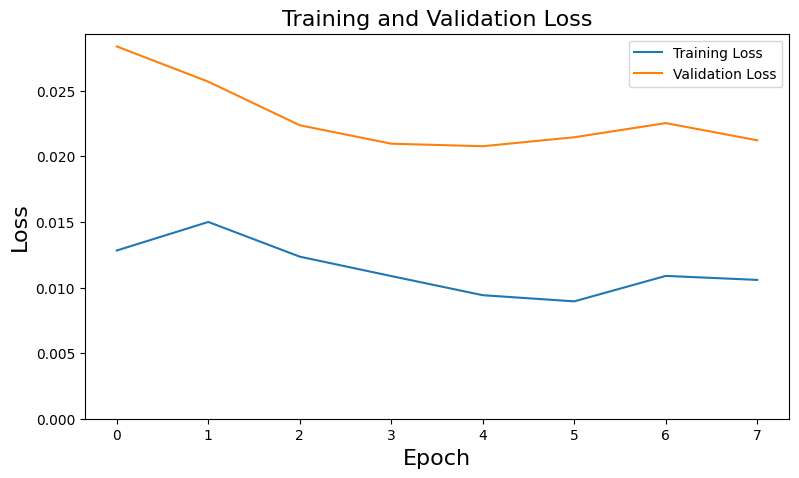

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize = 16)
plt.show()

## Evaluation

In [55]:
loss = model.evaluate(X_test, y_test, batch_size=1)
print("\nTest Loss: %.1f%%" % (100.0 * loss))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0166

Test Loss: 2.1%


In [56]:
train_predict = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [57]:
test_predict = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [58]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

In [59]:
y_train = scaler_train.inverse_transform(y_train)
y_test = scaler_test.inverse_transform(y_test)

In [60]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

In [61]:
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [62]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 23.412282943725586
Test RMSE: 46.760318756103516


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [64]:
train_prediction_df = result_df[lookback:position]

In [65]:
train_prediction_df["Predicted"] = train_predict

In [66]:
train_prediction_df.head()

,Passengers,Predicted
Month,,
1949-02-01,118.0,128.722290
1949-03-01,132.0,132.776947
1949-04-01,129.0,144.445099
1949-05-01,121.0,141.803925
1949-06-01,135.0,135.195160


In [67]:
test_prediction_df = result_df[position:lookback]
test_prediction_df["Predicted"] = test_predict.flatten()
test_prediction_df.head()

,Passengers,Predicted
Month,,
0,NaN,330.521149
1,NaN,322.930878
2,NaN,367.302704
3,NaN,359.804626
4,NaN,366.365479


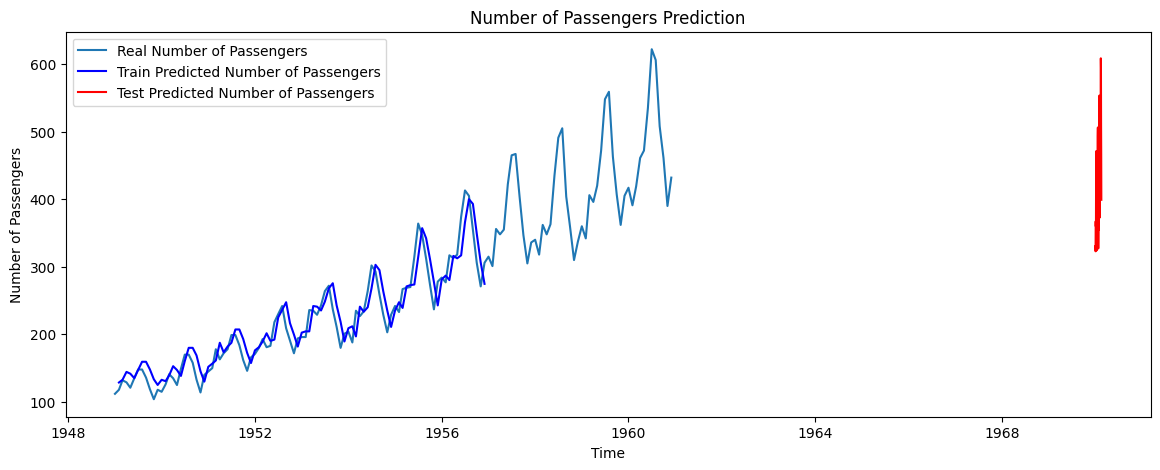

In [68]:
plt.figure(figsize=(14,5))
plt.plot(result_df, label = "Real Number of Passengers")
plt.plot(train_prediction_df["Predicted"], color = 'blue', label = "Train Predicted Number of Passengers")
plt.plot(test_prediction_df["Predicted"],color = 'red', label = "Test Predicted Number of Passengers")
plt.title("Number of Passengers Prediction")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()